# Amsterdam Crime Map

Project Overview: Exploring Amsterdam Through Data

As I prepare to move to Amsterdam in 2025, I’m leveraging my spatial data analysis skills to delve deeper into the city's geography, infrastructure, and cultural landscape. Although my connection with Amsterdam is currently brief—having visited as a tourist in April 2023—this project aims to enrich my understanding and provide data-driven insights that will inform my future decisions regarding daily life, travel, and urban navigation.

Through this work, I aim to explore Amsterdam's diverse neighborhoods, assess its infrastructure, and map key urban patterns, ultimately enabling me to make more informed, thoughtful choices once I settle in the city.



## Mapping the Administrative Boundaries of the Amsterdam

### 1. Data Source

* [PDOK (Public Data on the Map)](https://www.pdok.nl/): Provides official datasets from the Dutch government, including detailed administrative boundaries down to neighborhoods.

* [CBS (Statistics Netherlands)](https://www.cbs.nl/en-gb): Provides datasets on administrative boundaries and socio-economic data at the municipal, district, and neighborhood level.


### 2.  Map Making

#### 2.1 Understanding the Administrative Divisions in the Netherlands 


Administrative Hierarchy (in terms of political structure):

* Country: Netherlands (Nederland)

  * Provinces(Provincies): 12 provinces, each with a Provincial Government.

    * Municipalities(Gemeenten): 352 municipalities, each with a local government.

      * Wijken (Districts): Larger areas within municipalities; 
  
        * Buurten (Neighborhoods): Smaller subdivisions within districts.



#### 2.2 Map Making

Map 1: Administrative Provinces of the Netherlands

In [ ]:
pip install osmnx

In [ ]:
#import necessary library 

#osmnx:A Python library that allows you to download, model, and visualize street networks, building footprints, and other geospatial data from OpenStreetMap (OSM). 
import osmnx as ox # fetch geographic data of Amsterdam.

#matplotlib:plotting library that is used to create static, interactive, and animated visualizations.
import matplotlib.pyplot as plt # display the plot of Amsterdam's boundary

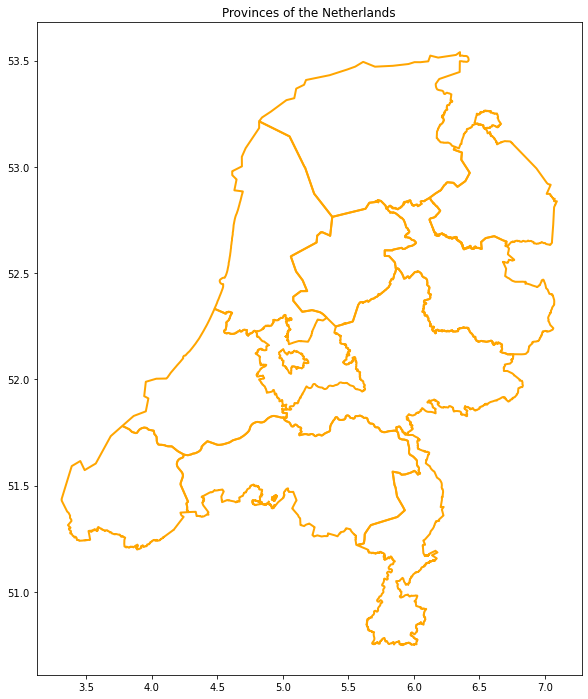

In [37]:
provinces = [
    "Drenthe, Netherlands", "Flevoland, Netherlands", "Friesland, Netherlands",
    "Gelderland, Netherlands", "Groningen, Netherlands", "Limburg, Netherlands",
    "Noord-Brabant, Netherlands", "Noord-Holland, Netherlands", "Overijssel, Netherlands",
    "Utrecht, Netherlands", "Zeeland, Netherlands", "Zuid-Holland, Netherlands"
]

fig, ax = plt.subplots(figsize=(12, 12))
for province in provinces:
    gdf = ox.geocode_to_gdf(province)
    gdf.plot(ax=ax, edgecolor='orange', facecolor='none', linewidth=2)
ax.set_title("Provinces of the Netherlands")
plt.show()

Map 2: Administrative Boundary of Amsterdam

/Users/tianqushao/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


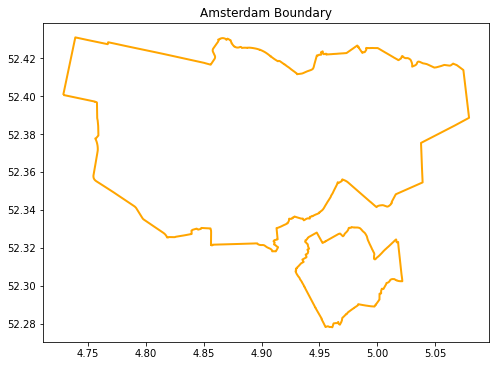

In [33]:
amsterdam = ox.geocode_to_gdf("Amsterdam, Netherlands")
fig, ax = plt.subplots(figsize=(8, 8))
amsterdam.plot(ax=ax, edgecolor='orange', facecolor='none', linewidth=2)
ax.set_title("Amsterdam Boundary")
plt.show()

Map 3: Districts (Wijken) and Neighborhoods (Buurten) of Amsterdam

The data used in this project was collected from [CBS_Wijk- en buurtkaart 2023](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2023)

<img src="Data_download.jpg" alt="1" width="600" height="400"/>

/var/folders/90/93hvgpc14tv382860vv6cc800000gn/T/ipykernel_60397/4802066.py:88: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  amsterdam_boundary.plot(ax=ax, color='none', edgecolor='red', linewidth=2)


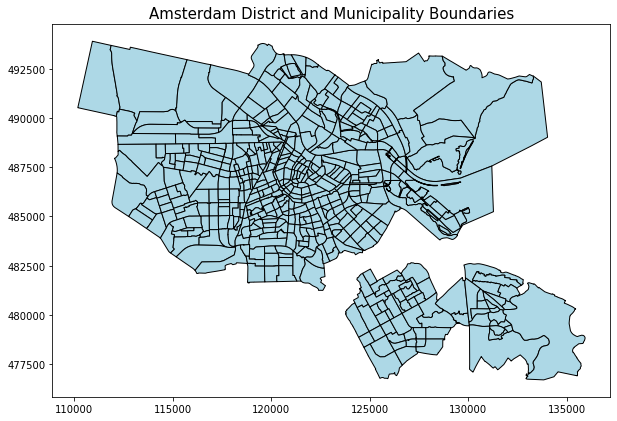

In [44]:
import geopandas as gpd

gdf = gpd.read_file('wijkenbuurten_2023_v2.gpkg')

# Dictionary to map Dutch column names to English
column_rename_dict = {
    'buurtcode': 'neighborhood_code',
    'buurtnaam': 'neighborhood_name',
    'wijkcode': 'district_code',
    'gemeentecode': 'municipality_code',
    'gemeentenaam': 'municipality_name',
    'indelingswijziging_wijken_en_buurten': 'district_and_neighborhood_reorganization',
    'water': 'water_area',
    'meest_voorkomende_postcode': 'most_common_postcode',
    'dekkingspercentage': 'coverage_percentage',
    'omgevingsadressendichtheid': 'surrounding_address_density',
    'stedelijkheid_adressen_per_km2': 'urban_density_addresses_per_km2',
    'bevolkingsdichtheid_inwoners_per_km2': 'population_density_per_km2',
    'aantal_inwoners': 'number_of_residents',
    'mannen': 'men',
    'vrouwen': 'women',
    'percentage_personen_0_tot_15_jaar': 'percentage_people_0_to_15_years',
    'percentage_personen_15_tot_25_jaar': 'percentage_people_15_to_25_years',
    'percentage_personen_25_tot_45_jaar': 'percentage_people_25_to_45_years',
    'percentage_personen_45_tot_65_jaar': 'percentage_people_45_to_65_years',
    'percentage_personen_65_jaar_en_ouder': 'percentage_people_65_years_and_older',
    'percentage_ongehuwd': 'percentage_single',
    'percentage_gehuwd': 'percentage_married',
    'percentage_gescheid': 'percentage_divorced',
    'percentage_verweduwd': 'percentage_widowed',
    'geboorte_totaal': 'total_births',
    'geboortes_per_1000_inwoners': 'births_per_1000_residents',
    'sterfte_totaal': 'total_deaths',
    'sterfte_relatief': 'relative_deaths',
    'aantal_huishoudens': 'number_of_households',
    'percentage_eenpersoonshuishoudens': 'percentage_single_person_households',
    'percentage_huishoudens_zonder_kinderen': 'percentage_households_without_children',
    'percentage_huishoudens_met_kinderen': 'percentage_households_with_children',
    'gemiddelde_huishoudsgrootte': 'average_household_size',
    'percentage_met_herkomstland_nederland': 'percentage_with_origin_country_netherlands',
    'percentage_met_herkomstland_uit_europa_excl_nl': 'percentage_with_origin_country_from_europe_excluding_nl',
    'percentage_met_herkomstland_buiten_europa': 'percentage_with_origin_country_outside_europe',
    'percentage_geb_in_nl_met_herkomstland_nederland': 'percentage_born_in_nl_with_origin_country_netherlands',
    'perc_geb_in_nl_met_herkomstland_in_europa_ex_nl': 'percentage_born_in_nl_with_origin_country_from_europe_excluding_nl',
    'perc_geb_in_nl_met_herkomstland_buiten_europa': 'percentage_born_in_nl_with_origin_country_outside_europe',
    'perc_geb_buiten_nl_met_herkomstlnd_in_europa_ex_nl': 'percentage_born_outside_nl_with_origin_country_from_europe_excluding_nl',
    'perc_geb_buiten_nl_met_herkomstlnd_buiten_europa': 'percentage_born_outside_nl_with_origin_country_outside_europe',
    'aantal_bedrijven_landbouw_bosbouw_visserij': 'number_of_farming_forestry_fishing_businesses',
    'aantal_bedrijven_nijverheid_energie': 'number_of_industry_energy_businesses',
    'aantal_bedrijven_handel_en_horeca': 'number_of_trade_and_hospitality_businesses',
    'aantal_bedrijven_vervoer_informatie_communicatie': 'number_of_transport_information_communication_businesses',
    'aantal_bedrijven_financieel_onroerend_goed': 'number_of_finance_real_estate_businesses',
    'aantal_bedrijven_zakelijke_dienstverlening': 'number_of_business_services_businesses',
    'aantal_bedrijven_overheid_onderwijs_en_zorg': 'number_of_government_education_healthcare_businesses',
    'aantal_bedrijven_cultuur_recreatie_overige': 'number_of_culture_recreation_other_businesses',
    'aantal_bedrijfsvestigingen': 'number_of_business_locations',
    'woningvoorraad': 'housing_stock',
    'gemiddelde_woningwaarde': 'average_house_value',
    'percentage_eengezinswoning': 'percentage_single_family_homes',
    'percentage_meergezinswoning': 'percentage_multi_family_homes',
    'percentage_bewoond': 'percentage_occupied',
    'percentage_koopwoningen': 'percentage_owned_homes',
    'percentage_huurwoningen': 'percentage_rental_homes',
    'perc_huurwoningen_in_bezit_woningcorporaties': 'percentage_rental_homes_owned_by_housing_corporations',
    'perc_huurwoningen_in_bezit_overige_verhuurders': 'percentage_rental_homes_owned_by_other_landlords',
    'percentage_woningen_met_eigendom_onbekend': 'percentage_homes_with_unknown_ownership',
    'percentage_bouwjaarklasse_tot_2000': 'percentage_buildings_built_before_2000',
    'percentage_bouwjaarklasse_vanaf_2000': 'percentage_buildings_built_after_2000',
    'percentage_leegstand_woningen': 'percentage_vacant_homes',
}

# Rename the columns in the GeoDataFrame
gdf_amsterdam = gdf_amsterdam.rename(columns=column_rename_dict)


fig, ax = plt.subplots(figsize=(10, 10))
gdf_amsterdam.plot(ax=ax, color='lightblue', edgecolor='black')
amsterdam_boundary = gdf_amsterdam[gdf_amsterdam['neighborhood_code'] == '9999']  # '9999' is a placeholder, replace with correct code if needed
amsterdam_boundary.plot(ax=ax, color='none', edgecolor='red', linewidth=2)
plt.title('Amsterdam District and Municipality Boundaries', fontsize=15)
plt.show()
